# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [527]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')

## Evaluación de modelos de regresión

Se han eliminado los datos de sklearn, se usará el csv Boston Housing que contiene los mismos datos

In [528]:
# Se han eliminado los datos de sklearn, no se puede usar este codigo
'''
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
'''

'\nfrom sklearn.datasets import load_boston\n\ndata = load_boston()\n\nX = pd.DataFrame(data["data"], columns=data["feature_names"])\ny = pd.DataFrame(data["target"], columns=[\'MEDV\'])\n\ndata = pd.concat([X, y], axis=1)\n'

In [529]:
data=pd.read_csv("BostonHousing.csv")

In [530]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [532]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [533]:
X=data.drop('medv',axis=1)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [534]:
y = pd.DataFrame(data['medv'])
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [535]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [536]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(506, 13)
(404, 13)
(102, 13)


In [537]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(506, 1)
(404, 1)
(102, 1)


## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [538]:
# Your code here
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

'Crear la resgresion lineal'
lin_reg = LinearRegression()

# Hacer fitting
lin_reg.fit(X_train, y_train)

# Mirar los coeficientes
print(lin_reg.intercept_, lin_reg.coef_)

[30.24675099] [[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [539]:
# Calculo las predicciones

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Calculo R cuadrado
r2_train = r2_score(y_train, y_train_pred)
print(f'R^2 (Train): {r2_train}')

r2_test = r2_score(y_test, y_test_pred)
print(f'R^2 (Test): {r2_test}')

R^2 (Train): 0.7508856358979673
R^2 (Test): 0.6687594935356326


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [540]:
# Your code here
# Calculo el error absoluto medio al cuadrado y, a partir de él, el error cuadratico medio
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(f'RMSE (Train): {rmse_train}')
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_test = np.sqrt(mse_test)
print(f'RMSE (Test): {rmse_test}')

RMSE (Train): 4.6520331848801675
RMSE (Test): 4.928602182665332


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [541]:
# Your code here
mae_train=mean_absolute_error(y_train,y_train_pred)
print(f'MAE (Train): {mae_train}')

mae_test=mean_absolute_error(y_test,y_test_pred)
print(f'MAE (Test): {mae_test}')

MAE (Train): 3.314771626783228
MAE (Test): 3.189091965887837


## Evaluación del modelo de clasificación

In [542]:
from sklearn.datasets import load_iris

data = load_iris()

#X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
#y_c = pd.DataFrame(data["target"], columns=["class"])

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [543]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [544]:
data.shape

(150, 5)

In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [546]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [547]:
#! pip install plotly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(120, 4)
(30, 4)


In [548]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(8,8))
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(6,6)});

<Figure size 800x800 with 0 Axes>

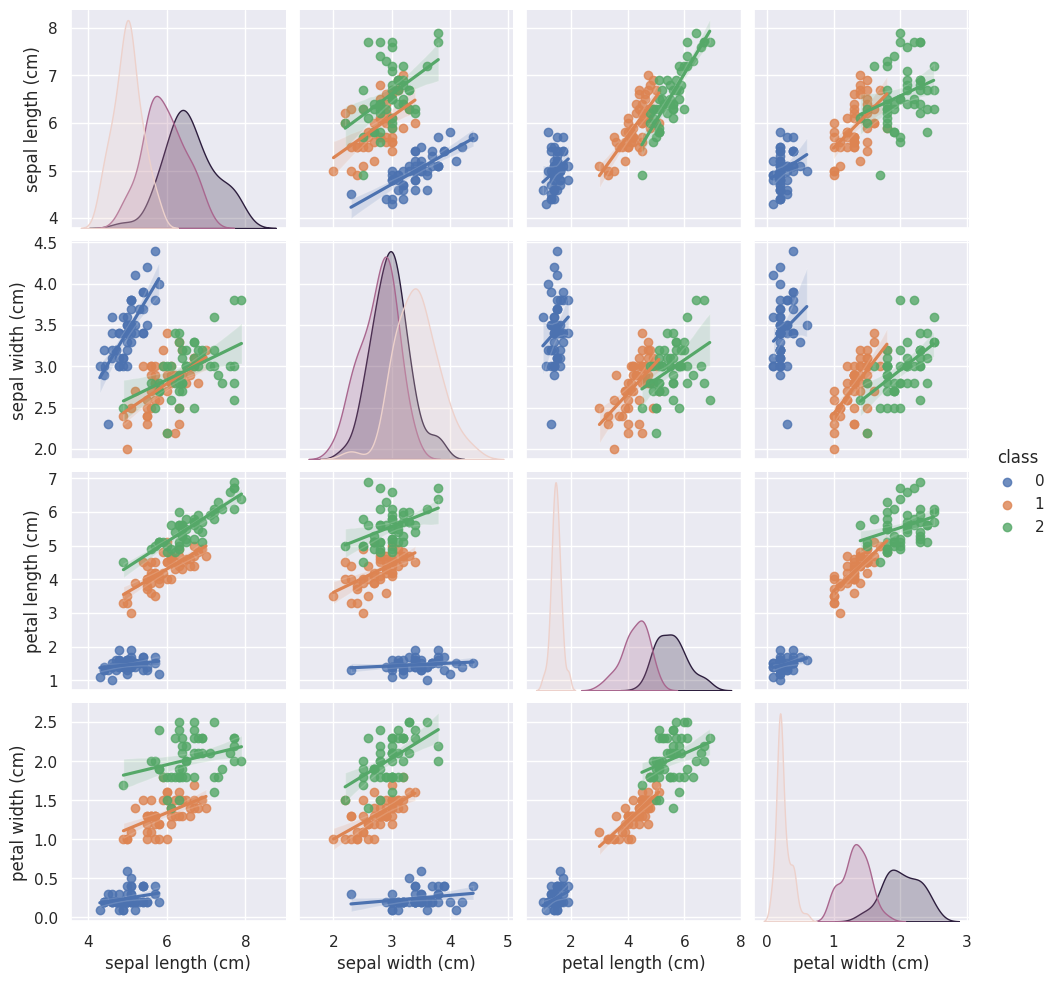

In [549]:
sns.pairplot(data,hue='class',kind='reg')
plt.show()

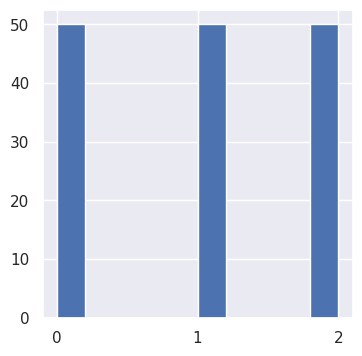

In [550]:
plt.figure(figsize=(4,4))
plt.hist(data['class'])
plt.xticks([0,1,2])
plt.show()

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [551]:
# Your code here
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [553]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(120, 4)
(30, 4)


In [554]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(120, 1)
(30, 1)


In [555]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [556]:
# Crear el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [557]:
# Validación cruzada
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(cv)
print("")
print(cv_scores)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

[0.95833333 0.95833333 0.875      1.         0.91666667]


In [558]:
# Entreno el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

In [559]:
# Evaluar el modelo test y train
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [560]:
#  Calculo accuracy( exactitud)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy test: {accuracy_test:.2f}')

accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy train: {accuracy_train:.2f}')

Accuracy test: 1.00
Accuracy train: 0.97


## 10. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de prueba.

In [561]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reporte de clasificación prueba ( incluye precision, recall y f1-score)
class_report_test = classification_report(y_test, y_pred_test)
print('Classification Report Test:')
print(class_report_test)


Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 11. Calcule e imprima la puntuación de recuerdo tanto para el conjunto de entrenamiento como para el de prueba.

In [562]:
# Reporte de clasificación entrenamiento ( incluye precision, recall y f1-score)
class_report_train = classification_report(y_train, y_pred_train)
print('Classification Report Train:')
print(class_report_train)


Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [563]:
# Your code here
print( " ver 10 y 11" )

 ver 10 y 11


## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

In [564]:
# Matriz de confusión test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix test:')
print(conf_matrix_test)

Confusion Matrix test:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [565]:
# Matriz de confusión entrenamiento
conf_matrix_train= confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix train:')
print(conf_matrix_train)

Confusion Matrix train:
[[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]


## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

In [566]:
# SVM
# Cogemos los X, y train_test ya generados para iris

from sklearn.svm import SVC

svm_rbf = SVC ( kernel='rbf', random_state=42)
svm_rbf

SVC(random_state=42)

In [567]:
#Generamos array para testear varias variables c y gamma

param_grid_rbf = {
    'C': [0.1, 1, 10, 25, 50, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid_search_rbf = GridSearchCV(svm_rbf,
                               param_grid_rbf,
                               cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring = 'accuracy',
                               verbose = 1,
                               n_jobs=-1)

In [568]:
# entreno el modelo
grid_search_rbf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=1)

In [569]:
best_rbf = grid_search_rbf.best_estimator_
best_rbf

SVC(C=10, gamma=0.01, random_state=42)

In [570]:
bs=grid_search_rbf.best_score_
bs

0.9666666666666668

In [571]:
y_pred = best_rbf.predict(X_test)

In [572]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy:.2f}\n")


Accuracy = 0.97



In [573]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"\nConfusion matrix:\n{conf_matrix}")



Confusion matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [574]:
reporte = classification_report(y_test, y_pred)
print(f"\nReporte de la clasificacion:\n{reporte}")


Reporte de la clasificacion:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Mirando los indicadores, para este conjunto de datos SVC tiene mejores resultadso que la regresion logistica

In [575]:
#redes neuronales para clasificacion
# Cogemos los X,y ya generados para iris

#escalamos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [576]:
y.value_counts()

class
0        50
1        50
2        50
Name: count, dtype: int64

In [577]:
# pasamos los valores de class a columnas por valor (0 a 2)
y = pd.get_dummies(y["class"])
y

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [578]:
y = y.values
y[:5]

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [579]:
# pasamos booleans a 0 - 1
y = y.astype(np.uint)
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint64)

In [580]:
#Dividimos en train y test 20-80
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
print(f'x tr {X_train.shape} x te {X_test.shape} y tr {y_train.shape} y te {y_test.shape}')

x tr (120, 4) x te (30, 4) y tr (120, 3) y te (30, 3)


In [581]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [582]:
# calculo num neuronas inicial y final
num_neuronas = X_train.shape[1]
num_neuronas_final = len(data['class'].unique())
print(f"num_neuronas = {num_neuronas}\nnum_neuronas_final = {num_neuronas_final}")

num_neuronas = 4
num_neuronas_final = 3


In [586]:
#hacemo el modelo con 1 capa intermedia de 3 neuronas, la inicial de 4 y la final de 3
model = Sequential()
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = int(num_neuronas),activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = int(num_neuronas_final),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy']) # porue las etiquetas no son One Hot Encoding

In [587]:
# añadimos un earystop
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=35)

In [588]:
#entrenamos el modelo
model.fit(x = X_train,
          y=y_train,
          epochs=700,
          batch_size=175,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/700
1/1 [==============================] - 3s 3s/step - loss: 1.0243 - categorical_accuracy: 0.3167 - val_loss: 1.0354 - val_categorical_accuracy: 0.2667
Epoch 2/700
1/1 [==============================] - 0s 36ms/step - loss: 1.0158 - categorical_accuracy: 0.3833 - val_loss: 1.0336 - val_categorical_accuracy: 0.2667
Epoch 3/700
1/1 [==============================] - 0s 36ms/step - loss: 1.0283 - categorical_accuracy: 0.3333 - val_loss: 1.0318 - val_categorical_accuracy: 0.3000
Epoch 4/700
1/1 [==============================] - 0s 35ms/step - loss: 1.0308 - categorical_accuracy: 0.3417 - val_loss: 1.0300 - val_categorical_accuracy: 0.3333
Epoch 5/700
1/1 [==============================] - 0s 52ms/step - loss: 1.0285 - categorical_accuracy: 0.3333 - val_loss: 1.0283 - val_categorical_accuracy: 0.3333
Epoch 6/700
1/1 [==============================] - 0s 56ms/step - loss: 1.0226 - categorical_accuracy: 0.3917 - val_loss: 1.0265 - val_categorical_accuracy: 0.3333
Epoch 7/700
1/1 [=

In [590]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [592]:
prediccion = model.predict(X_test)
prediccion[:5]

1/1 [==============================] - 0s 122ms/step


array([[8.7462527e-01, 1.1785571e-01, 7.5191106e-03],
       [8.7462527e-01, 1.1785571e-01, 7.5191106e-03],
       [8.7462527e-01, 1.1785571e-01, 7.5191106e-03],
       [3.7675834e-04, 4.3092903e-01, 5.6869423e-01],
       [2.1774672e-02, 7.0563900e-01, 2.7258644e-01]], dtype=float32)

In [602]:
y_test[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint64)

In [594]:
prediccion = np.argmax(prediccion,axis=1)
prediccion

array([0, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [600]:
df_test = pd.DataFrame(y_test, columns = ['cl_0','cl_1','cl_2'])

df_test.head()

,cl_0,cl_1,cl_2
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0


In [604]:
# Cambiamos la mariz a una columna
df_test["Clase_Real"] = np.where(df_test['cl_0'] == 1,0,np.where(df_test['cl_1'] == 1,1,2))
df_test["Clase_Real"].head()

0    0
1    0
2    0
3    2
4    1
Name: Clase_Real, dtype: int64

In [607]:
# La convierto en array
array_clases_real = df_test["Clase_Real"].to_numpy()
array_clases_real

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [612]:
#confusion matrix
cnf_matrix = confusion_matrix( array_clases_real , prediccion , labels = clases )
cnf_matrix

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [613]:
clases = [0,1,2]
# funcion para hacer el grafico de confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


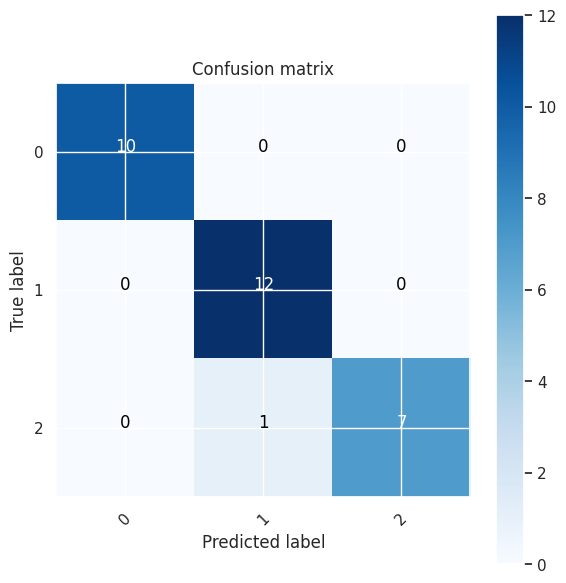

In [614]:
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix , classes = clases)

In [616]:
clases2 = ['Clase 0' , 'Clase 1' , 'Clase 2']

print(f"Confusion matrix:\n{cnf_matrix}")
reporte = classification_report(array_clases_real , prediccion , target_names = clases2)
print(f"Clasificacion Reporte:\n{reporte}")
acuracy = accuracy_score(array_clases_real , prediccion )
print(f"Precision:\n{acuracy}")

Confusion matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
Clasificacion Reporte:
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00        10
     Clase 1       0.92      1.00      0.96        12
     Clase 2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Precision:
0.9666666666666667


El resultado es bueno, solo se ha equivocado en una prediccion de clase 2 que ha clasificado como clase 1. Se podria intentar ajustar un poco más.